# Total COVID-19 deaths for different countries

Script produced by [Laurent Lessard](https://laurentlessard.com)

---

### Import data from JHU CSSE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_raw = pd.read_csv(url)

### Reformat data into convenient form

In [2]:
colnames = df_raw.columns

# aggregate by region
df = df_raw.pivot_table(index='Country/Region',values=colnames[4:],aggfunc=sum)

# make countries columns rather than rows
df = df.T

# make the index a datetime object
df = df.reindex( pd.to_datetime(df.index) )

# sort the dates/times
df.sort_index(inplace=True)

# record the latest date
latest_date = df.index[-1].strftime("%a %b %d, %Y")

### List of countries with at least 50 deaths

In [40]:
countries = df.columns[df.iloc[-1] >= 50]

for (i,c) in enumerate(countries):
    print( c.ljust(20), end=' ')
    if i % 5 == 0:
        print()

Algeria              
Austria              Belgium              Brazil               Canada               China                
Denmark              Dominican Republic   Ecuador              Egypt                France               
Germany              Greece               India                Indonesia            Iran                 
Iraq                 Ireland              Italy                Japan                Korea, South         
Netherlands          Philippines          Portugal             Romania              Spain                
Sweden               Switzerland          Turkey               US                   United Kingdom       


### Plot shifted death toll for selected countries

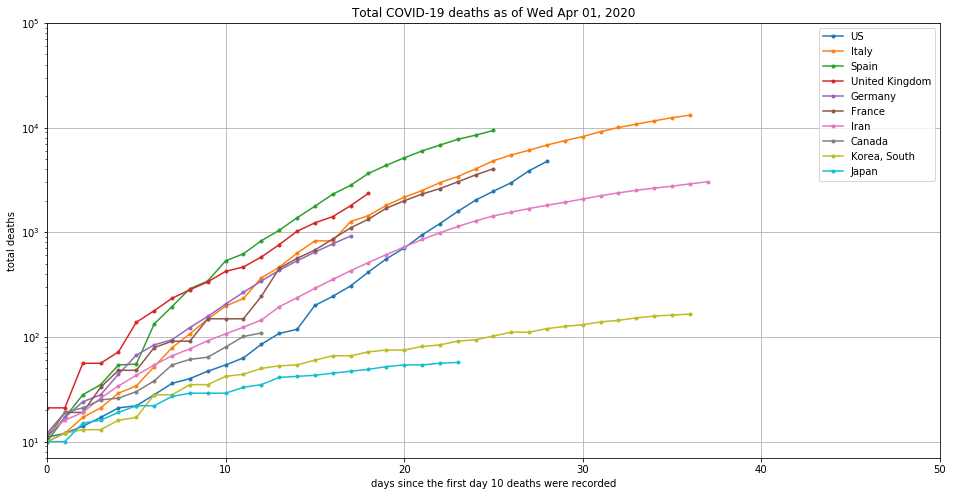

In [48]:
# function that shifts the data so everything starts from first min_deaths
def shift_data( countries, min_deaths ):
    shifted_data = []
    for (c,data) in df[countries].items():
        shifted_data.append( data[data >= min_deaths].reset_index(drop=True) )
    return shifted_data

# selected countries
countries = ['US','Italy','Spain','United Kingdom','Germany','France','Iran', 'Canada', 'Korea, South', 'Japan']
min_deaths = 10

# shift data so that index corresponds to days since min_death deaths.
shifted_data = shift_data( countries, min_deaths )

# merge into a single dataframe
dfx = pd.concat( shifted_data, axis=1 )

# make plot
ax = dfx.plot(title="Total COVID-19 deaths as of %s" % latest_date, logy=True, figsize=(16,8), grid=True, marker='.');
ax.set_xlabel("days since the first day %g deaths were recorded" % min_deaths )
ax.set_ylabel("total deaths")
ax.set_ylim(7,1e5)
ax.set_xlim(0,50);
#ax.autoscale(enable=True, axis='x', tight=True)

### Plot deaths in the past week versus total deaths

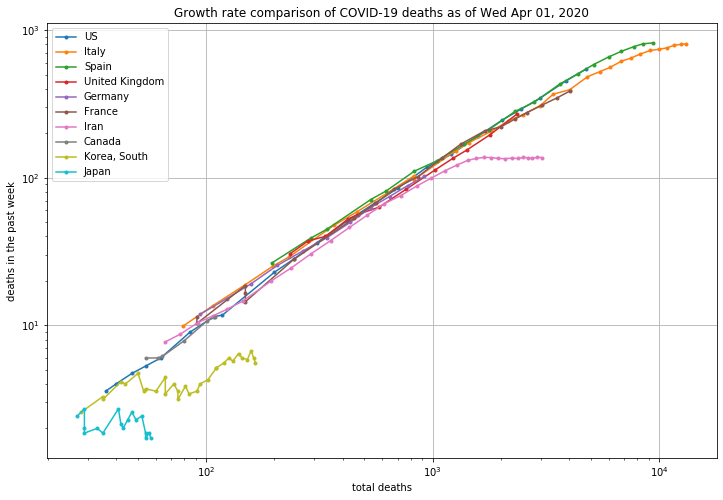

In [49]:
plt.figure(figsize=(12,8))

for data in shifted_data:
    plt.loglog( data, data.diff().rolling(7).mean(), marker=".", label=data.name )
    
plt.xlabel("total deaths")
plt.ylabel("deaths in the past week")
plt.grid()
plt.title("Growth rate comparison of COVID-19 deaths as of %s" % latest_date)
plt.legend();

### Plot the "Ten-Hundred plot" for total deaths
The idea for this plot is due to [Jerry Zhu](https://www.youtube.com/watch?v=NP3ZdQwrL_Q)

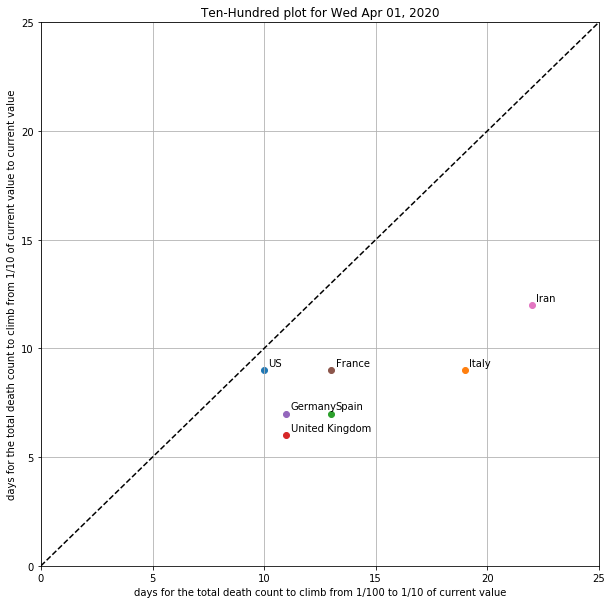

In [83]:
# selected countries (should have >> 100 deaths for the plot to be meaningful)
countries = ['US','Italy','Spain','United Kingdom','Germany','France','Iran']
min_deaths = 10

# strip time indices since they don't matter for this plot
df_stripped = df.reset_index(drop=True)

plt.figure(figsize=(10,10))

for country in countries:
    data = df_stripped[country]
    ix_end = data.index[-1]
    ix_10  = data[ data < data.iloc[-1]/10  ].index[-1]
    ix_100 = data[ data < data.iloc[-1]/100 ].index[-1]
    x = ix_end - ix_10
    y = ix_10 - ix_100
    plt.scatter( x, y, marker="o", label=data.name )
    plt.text( x+.2, y+.2, country )
plt.plot([0,100],[0,100],'k--')
    
plt.xlabel("days for the total death count to climb from 1/100 to 1/10 of current value")
plt.ylabel("days for the total death count to climb from 1/10 of current value to current value")
plt.grid()
plt.axis([0,25,0,25])
plt.title("Ten-Hundred plot for %s" % latest_date);